# Audio Data Augmentation

In [16]:
from audio import *

In [17]:
#Export
import matplotlib.pyplot as plt
from IPython.display import Audio
import torch
from fastai.text import * 
from fastai.vision import *
import torch
import librosa
import torchaudio
from torchaudio import transforms

In [ ]:
def source(f):
    print(inspect.getsource(f))

## IMPORTANT: audio transformations I/O is AudioData type

All the audio transformations operates on AudioData type

In [18]:
source(show_AudioData)

## Sample Data: Timit

In [4]:
path = getFastAiWorkingDirectory('timit')

Working directory: /home/ste/.fastai/data/timit


In [5]:
example = AudioData.load(str(path/'TRAIN/DR1/MDPK0/SA1.WAV'))
show_AudioData(example)

sr:16000   sig.shape:torch.Size([46080])


**IMPORTANT: We want the sample to be a unidimensional tensor**
<br />
We're using **(sig,sr)** for all our tests.

## Setup

In [6]:
source(show_in_out)

In [7]:
source(tfm_tester)

# Augmentation Functions

## White Noise

In [8]:
source(tfm_add_white_noise)

sr:16000   sig.shape:torch.Size([46080])


sr:16000   sig.shape:torch.Size([46080])


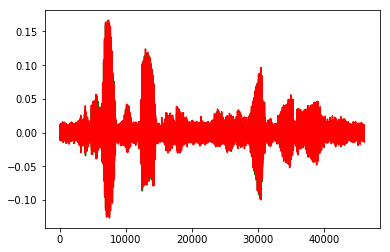

In [9]:
tfm_tester(example, tfm_add_white_noise)

## Volume Change

In [10]:
source(tfm_modulate_volume)

sr:16000   sig.shape:torch.Size([46080])


sr:16000   sig.shape:torch.Size([46080])


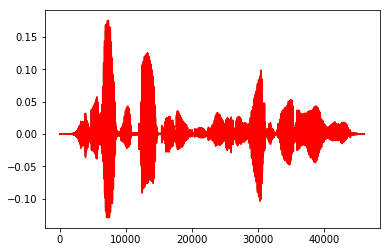

In [11]:
tfm_tester(example, tfm_modulate_volume)

## Random Cutout

In [12]:
source(tfm_random_cutout)

sr:16000   sig.shape:torch.Size([46080])


sr:16000   sig.shape:torch.Size([46080])


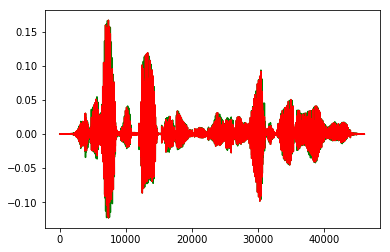

In [13]:
tfm_tester(example, partial(tfm_random_cutout,pct_to_cut=.95))

## Pad with Silence

In [14]:
source(tfm_pad_with_silence)

sr:16000   sig.shape:torch.Size([46080])


sr:16000   sig.shape:torch.Size([46080])


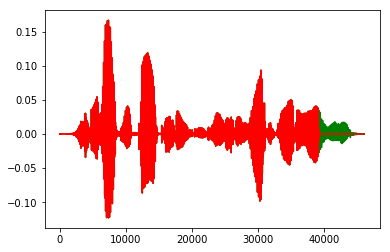

In [15]:
tfm_tester(example, tfm_pad_with_silence)

## Pitch Warp

In [16]:
source(tfm_pitch_warp)

## Lossy Downsample and Upsample

In [17]:
source(tfm_down_and_up)

sr:16000   sig.shape:torch.Size([46080])


sr:16000   sig.shape:torch.Size([46080])


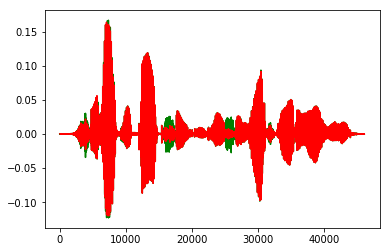

In [18]:
tfm_tester(example, tfm_down_and_up)

## Signal Mixup

In [19]:
source(tfm_signal_mixup)

## Combined Augmentations

sr:16000   sig.shape:torch.Size([46080])


sr:16000   sig.shape:torch.Size([46080])


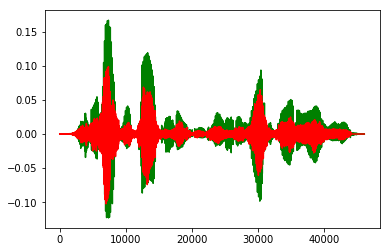

In [20]:
tfm_tester(example, [tfm_down_and_up, tfm_pitch_warp, tfm_pad_with_silence])

sr:16000   sig.shape:torch.Size([46080])


sr:16000   sig.shape:torch.Size([46080])


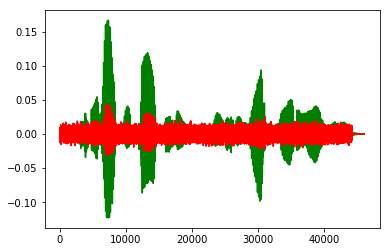

In [21]:
tfm_tester(example, [tfm_modulate_volume, tfm_pitch_warp, tfm_add_white_noise, tfm_pad_with_silence])

In [22]:
# Other stuff to possibly explore
# AudioSegment(…).overlay()
# AudioSegment(…).apply_gain(gain)
# AudioSegment(…).invert_phase()
# AudioSegment(…).set_sample_width()

# Generic Transforms

### Pad to maximum value (resize)

In [23]:
source(tfm_pad_to_max)

sr:16000   sig.shape:torch.Size([46080])


sr:16000   sig.shape:torch.Size([46080])


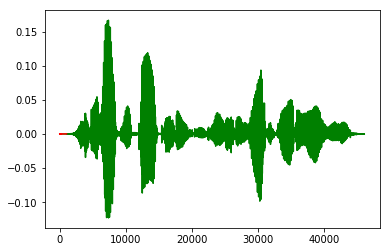

In [24]:
tfm_tester(example, partial(tfm_pad_to_max))

sr:16000   sig.shape:torch.Size([46080])


sr:16000   sig.shape:torch.Size([46080])


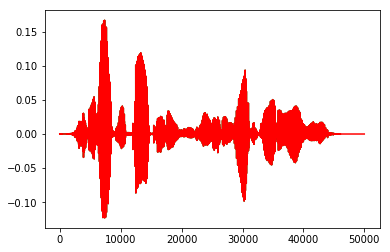

In [25]:
tfm_tester(example, partial(tfm_pad_to_max, mx=50000))

### Log input type and properties

In [26]:
source(tfm_log)

AudioData >> Shape of signal: torch.Size([46080])  sr: 16000
sr:16000   sig.shape:torch.Size([46080])


sr:16000   sig.shape:torch.Size([46080])


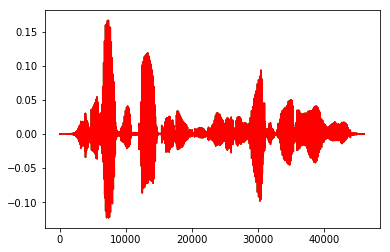

In [27]:
tfm_tester(example, tfm_log)

## External functions

### Amplitude to db
Librosa has a function that transforms a signal from amplitude to deciblel/db scale (amplitude_to_db).
Torchaudio seems to have the same functionality (SPEC2DB) but that functionality is not documented and not accessible for current torchaudio installatio.
Probably it will be added in the next version of the library (SPEC2DB is called by MEL2).
The following code is taken from the official torchaudio docs:
https://pytorch.org/audio/_modules/torchaudio/transforms.html

In [ ]:
source(SPEC2DB)

## Formatting Transforms

In [29]:
source(tfm_extract_signal)

In [30]:
source(tfm_spectro)

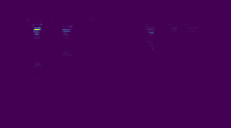

torch.Size([1, 128, 231])

In [31]:
img = Image(tfm_spectro(example, n_mels=128))
display(img, img.shape)

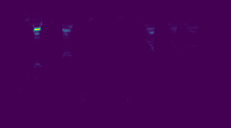

torch.Size([1, 128, 231])

In [32]:
#Default values...
img = Image(tfm_spectro(example, n_mels=128, ws=400, n_fft=1600))
display(img, img.shape)

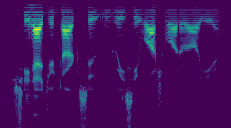

torch.Size([1, 128, 231])

In [33]:
img = Image(tfm_spectro(example, n_mels=128, to_db_scale=True))
display(img, img.shape)

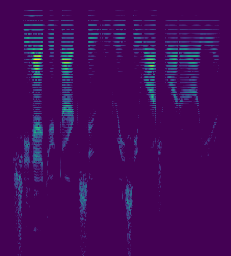

torch.Size([1, 256, 231])

In [34]:
img=tfm_spectro(example, n_mels=256, to_db_scale=True)
display(Image(img),img.shape)

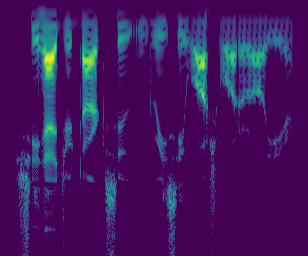

torch.Size([1, 256, 308])

In [35]:
img=tfm_spectro(example, n_mels=256, ws=300, n_fft=3200, to_db_scale=True)
display(Image(img),img.shape)

In [36]:
source(tfm_spectro_stft)

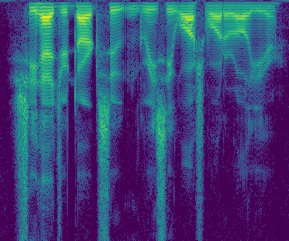

In [37]:
display(Image(tfm_spectro_stft(example)))

## Performance

### Transformations performance

In [38]:
%timeit -n100 tfm_add_white_noise(example)

310 µs ± 8.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [39]:
%timeit -n100 tfm_modulate_volume(example)

14.2 µs ± 1.99 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [40]:
%timeit -n100 tfm_random_cutout(example)

36.8 ms ± 95.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [41]:
%timeit -n100 tfm_pad_with_silence(example)

22.2 µs ± 1.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [42]:
%timeit -n100 tfm_pitch_warp(example)

52 ms ± 421 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [43]:
%timeit -n100 tfm_down_and_up(example)

64.9 ms ± 44.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**VERDICT:**<br>
Slow transformations are:
+ tfm_random_cutout 
+ tfm_pitch_warp  
+ tfm_down_and_up

### Spectrogram performance

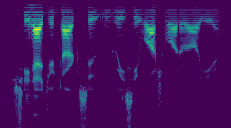

232 µs ± 1.82 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [44]:
def getSpectroInDb_torchaudio(example):
    mel = tfm_spectro(example, n_mels=128)
    img = SPEC2DB(stype='magnitude', top_db=-80)(mel)
    return img
display(Image(getSpectroInDb_torchaudio(example)))

mel = tfm_spectro(example, n_mels=128)
%timeit SPEC2DB(stype='magnitude', top_db=-80)(mel)

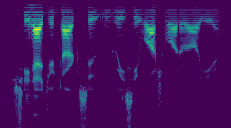

225 µs ± 309 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [45]:
def getSpectroInDb_librosa(example):
    mel = tfm_spectro(example, n_mels=128)
    img = librosa.amplitude_to_db(np.array(mel))
    img = torch.tensor(img)
    return img
display(Image(getSpectroInDb_librosa(example)))

mel = tfm_spectro(example, n_mels=128)
%timeit torch.tensor(librosa.amplitude_to_db(np.array(mel)))

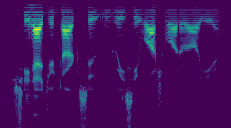

100 µs ± 213 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [46]:
def getSpectroInDb_torchaudio_cuda(example):
    mel = tfm_spectro(example, n_mels=128)
    img = SPEC2DB(stype='magnitude', top_db=-80)(mel)
    return img
display(Image(getSpectroInDb_torchaudio_cuda(example)))

mel = tfm_spectro(example, n_mels=128)
mel = mel.cuda()
%timeit SPEC2DB(stype='magnitude', top_db=-80)(mel)

**VERDICT:** 
The torchaudio on gpu is way faster than others...